In [1]:
import pandas as pd
import nltk
import re


In [2]:

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the sentence.csv file into a Pandas DataFrame
df = pd.read_csv('sentences.csv', encoding='utf-8')
df= df.rename(columns={'0': 'sentence'})
# Convert all the sentences to lowercase
#df['sentence'] = df['sentence'].str.lower()

# Remove any leading or trailing whitespace from the sentences
df['sentence'] = df['sentence'].str.strip()

# Remove any punctuation marks from the sentences
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Tokenize the sentences into words
df['tokens'] = df['sentence'].apply(nltk.word_tokenize)

# Remove any stop words from the sentences
#stop_words = set(nltk.corpus.stopwords.words('english'))
#df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stem the words in the sentences
#stemmer = nltk.PorterStemmer()
#df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Join the stemmed words back into a sentence
df['preprocessed'] = df['tokens'].apply(lambda x: ' '.join(x))

# Save the preprocessed DataFrame into a new CSV file
df.to_csv('preprocessed_sentence.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#import pandas as pd

# Read the sentence.csv file into a pandas dataframe
df = pd.read_csv('preprocessed_sentence.csv')
#df= df.rename(columns={'0': 'Sentences'})
# Print the first 10 rows of the dataframe
print(df.sample(10))

                                                sentence  \
10084  Her lady mother had been fertile so there was ...   
8258   Near a juncture where five alleys came togethe...   
8183   Three of the seven gates of Kings Landing were...   
2512   In war he would boast he would neer lay down h...   
6262   The twins Jaehaerys and Jaehaera were six year...   
7866   Dragon would fight dragon and this time the ci...   
9463   Pentos Braavos and Lorath were similarly affec...   
9440   Though many availed themselves of this coin th...   
8235   Munkun tells us they were men of honor duty bo...   
9446   When questioned he told the regents that this ...   

                                                  tokens  \
10084  ['Her', 'lady', 'mother', 'had', 'been', 'fert...   
8258   ['Near', 'a', 'juncture', 'where', 'five', 'al...   
8183   ['Three', 'of', 'the', 'seven', 'gates', 'of',...   
2512   ['In', 'war', 'he', 'would', 'boast', 'he', 'w...   
6262   ['The', 'twins', 'Jaehaerys', 'a

In [ ]:
df.head(10)

In [ ]:
df.size

def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df.sample(20))

display_text_max_col_width(df["Sentences"], 800)

In [ ]:
df=df.dropna()

In [ ]:
df.size

def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df.sample(20))

display_text_max_col_width(df["Sentences"], 800)

In [2]:
!python -m spacy download en_core_web_sm


     --------------------------------------- 13.7/13.7 MB 21.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy
import csv
#import pandas as pd

nlp = spacy.load('en_core_web_sm')




In [5]:
entities_list = []

with open('sentences.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader) # skip the header row
    for row in reader:
        doc = nlp(row[0])
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        entities_list.extend(entities)

dfe = pd.DataFrame(entities_list, columns=['Entity', 'Label'])

print(dfe.head())


                                              Entity   Label
0                                      FIRE  & BLOOD     ORG
1  GEORGE R. R. MARTIN\n\n\n\n\n\n\n\n\n\n\n\n\n\...  PERSON
2                                       Fire & Blood     ORG
3                                               2018    DATE
4                  George R. R. Martin Illustrations  PERSON


In [ ]:
dfe.sample(10)

In [6]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [7]:
from tqdm import tqdm

In [10]:
entity_pairs = []
df1 = pd.read_csv('sentences.csv', encoding='utf-8')
df1= df1.rename(columns={'0': 'Sentences'})
for i in tqdm(df1['Sentences']):
  entity_pairs.append(get_entities(i))

100%|████████████████████████████████████████████████████████████████████████████| 11088/11088 [03:15<00:00, 56.85it/s]


In [15]:
entity_pairs[10:35]

[['who', 'three hundred three years'],
 ['Births', 'other  Conquest'],
 ['such  dating', ''],
 ['Aegon conquest', 'single Seven day'],
 ['Dorne', 'years  landing'],
 ['well King it', 'precise end Conquest'],
 ['Even start date', 'misconception'],
 ['where Blackwater city', 'Landing'],
 ['', ''],
 ['actually  he', 'High Faith'],
 ['coronation', 'major \n\n\n\n Conquest'],
 ['most', 'actual 2–1 Conquest'],
 ['Targaryens', 'ancient  lineage'],
 ['114 Aenar Targaryen', 'narrow smoking sea'],
 ['Valyria', 'known  civilization'],
 ['rival  houses', 'savage  dominance'],
 ['most  rivals', 'surrender'],
 ['maiden daughter Daenys', 'afterward  fire'],
 ['later  Targaryens', ''],
 ['Dragonstone', 'two  centuries'],
 ['Gullet', 'passing Blackwater trade'],
 ['narrow Claw Targaryens', 'dragons'],
 ['named House Targaryen', 'little  Westeros'],
 ['Gaemon Targaryen', 'Gaemon'],
 ['son', 'together  death']]

In [19]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 
  matcher.add("matching_1", [pattern], on_match = None) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [20]:
from spacy.matcher import Matcher

In [22]:
relations = [get_relation(i) for i in tqdm(df1['Sentences'])]

100%|████████████████████████████████████████████████████████████████████████████| 11088/11088 [03:28<00:00, 53.07it/s]


In [23]:
pd.Series(relations).value_counts()[:50]

was            854
said           269
were           196
had            183
told           159
took           127
is             122
found           98
made            96
came            88
been            78
tells           76
sent            71
have            70
be              68
began           67
says            60
declared        58
brought         56
commanded       56
gave            52
proved          51
went            50
did             49
are             49
\n\n            46
agreed          45
know            45
became          43
died            42
remained        40
left            39
taken           38
named           37
turned          36
followed        35
replied         35
reached         35
say             35
set             35
knew            34
asked           34
returned to     33
seemed          33
come            32
put             31
thought         31
wrote           31
given           30
saw             28
dtype: int64

In [24]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'relation':relations})

In [25]:
kg_df=kg_df.dropna()

In [26]:
kg_df.sample(10)

,source,target,relation
1387,She,list,handed
4090,queen,sharp derision,said in
2416,together Jaehaerys,majority,were
9287,he,,listened
1851,wedding half,beyond Seven it,celebrated in
7163,dragons,brighter next,fell like
6298,Princess brothers,small beds,remained unaware
10781,even Shadow,surely end,overwhelmed in
10542,such they,well fear,had
10973,once Prince Viserys,day wife,appear


In [27]:
#import csv
#import spacy
import networkx as nx
import matplotlib.pyplot as plt


# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

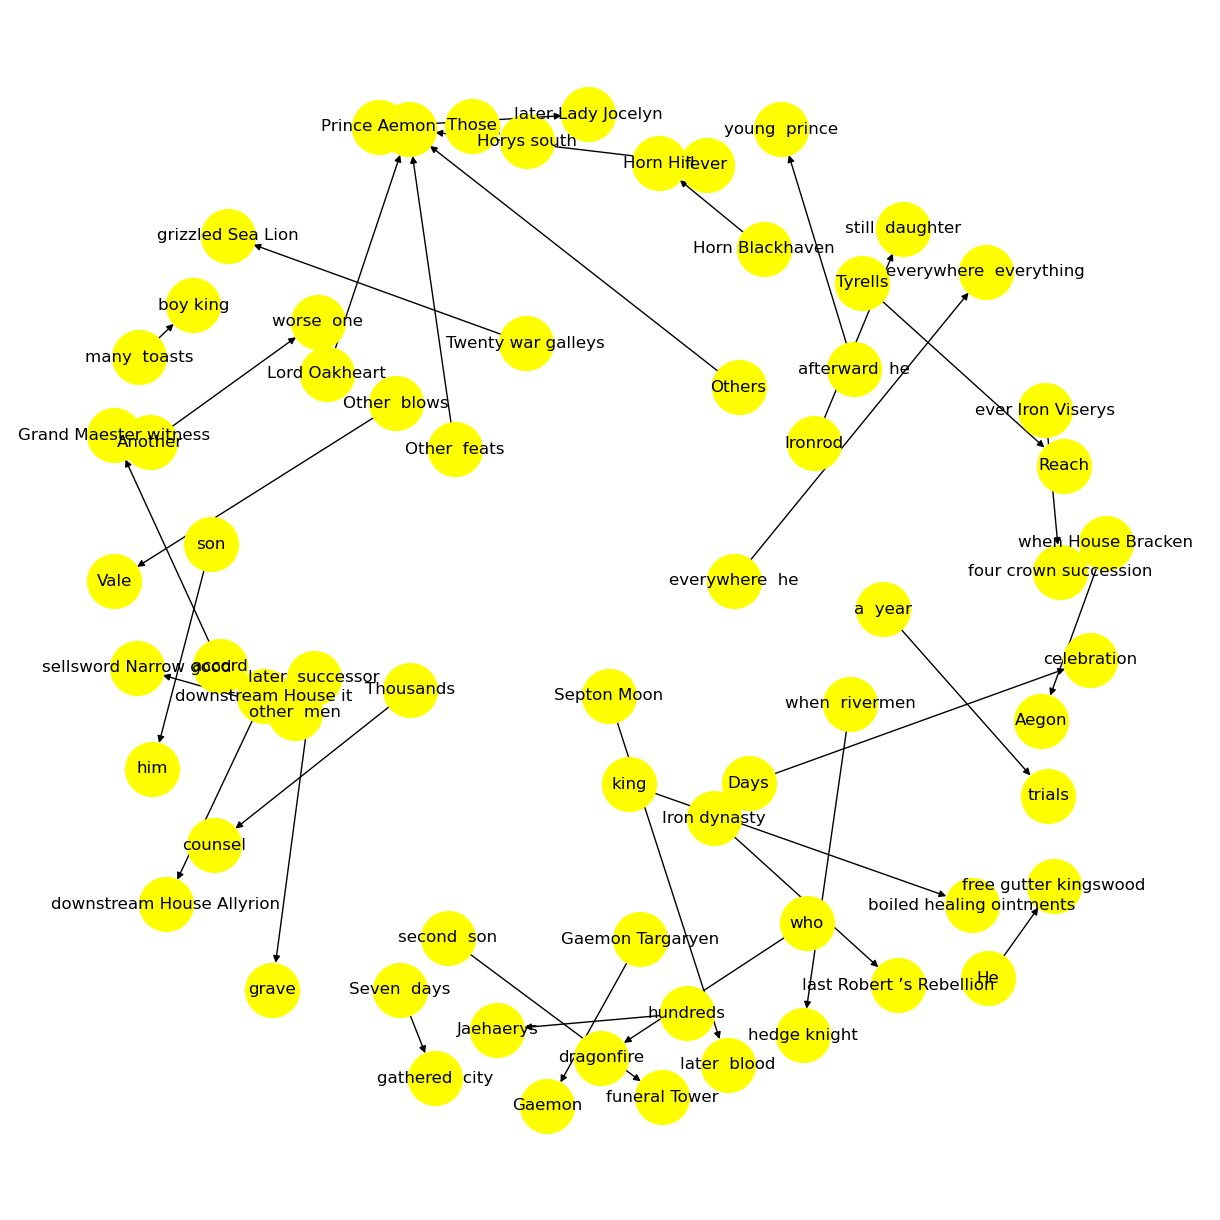

In [42]:
G=nx.from_pandas_edgelist(kg_df[kg_df['relation']=="followed"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='yellow', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="wrote"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

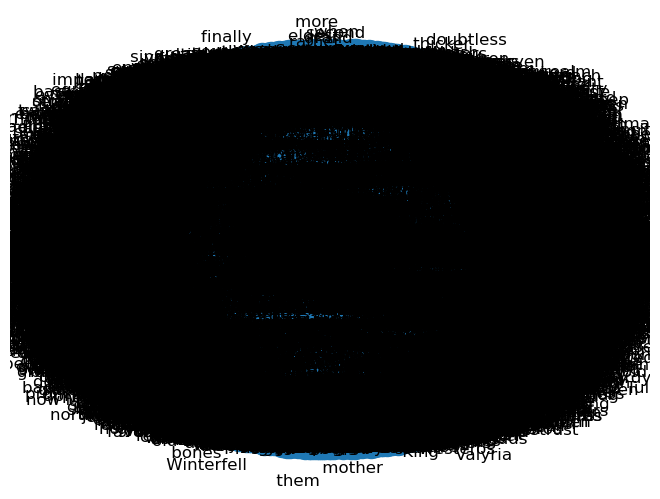

In [44]:
import json
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
# Save the graph as a JSON file
with open("graph.json", "w") as f:
    json.dump(nx.node_link_data(G), f)

# Save the graph as a PNG file
nx.draw(G, with_labels=True)
plt.savefig("graph.png")

In [45]:
kg_df.to_csv('relation_dataset.csv', index=False)